# Perfil de concentração de reagentes, produtos e temperatura em reator continuamente misturado

In [2]:
import numpy as np

In [3]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [11]:
from math import exp
import seaborn as sns

In [12]:
def CSTRartigo(x,t,F,Cae,Cbe,Cce,Cde,Vr,k0,E,R,U,Te,Tc,A,Hr,rho,Cp):
    Ca = x[0]
    Cb = x[1]
    Cc = x[2]
    Cd = x[3]
    T = x[4]
    k = k0*exp(-E/(R*T))
    dCadt = F*(Cae - Ca)/Vr - k*(Ca*Cb)
    dCbdt = F*(Cbe - Cb)/Vr - k*(Ca*Cb)
    dCcdt = F*(Cce - Cc)/Vr + k*(Ca*Cb)
    dCddt = F*(Cde - Cd)/Vr + k*(Ca*Cb)
    dTdt =  F*(Te - T)/Vr + U*A*(Tc - T)/(rho*Cp*Vr) + k*Ca*Cb*Hr*Vr/(rho*Vr*Cp)
    return [dCadt,dCbdt,dCcdt,dCddt,dTdt]

In [13]:
tf = 10000
t = np.linspace(0,tf,10*tf)
x0 = [1000,1500,350,0,353.15]
F = 0.01
Cae = 0
Cbe = 0
Cce = 0
Cde = 0
Vr = 50
k0 = 1.0455e10
E = 101605
R = 8.314
U = 20934
Te = 308.15
Tc = 333.15
#Vc = 0.1*Vr
#D = 1
#L = 4*(Vr+Vc)/(pi*D**2)
A = 1 #pi*D*L
Hr = -7880
rho = 931
Cp = 4180

In [14]:
y = odeint(CSTRartigo,x0,t,args=(F,Cae,Cbe,Cce,Cde,Vr,k0,E,R,U,Te,Tc,A,Hr,rho,Cp))

Text(0.5, 1.0, 'Perfil de temperatura em reator')

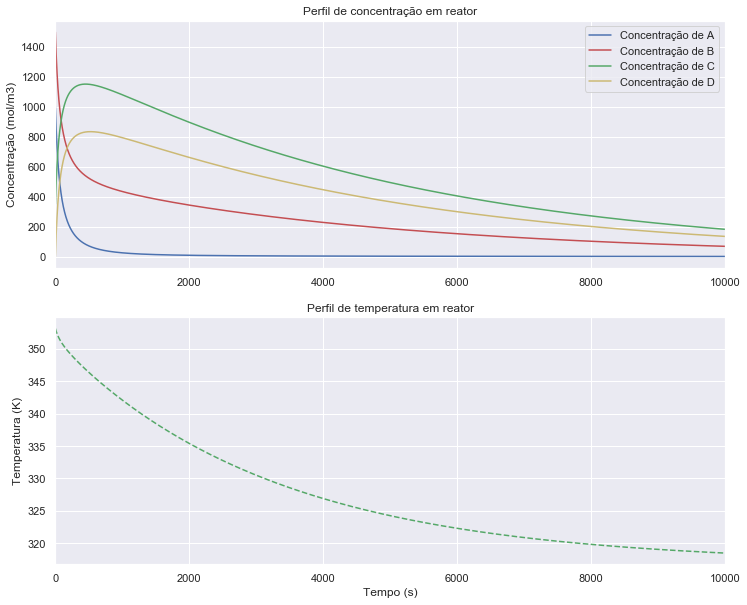

In [15]:
plt.figure(figsize=(12,10))
sns.set()
#plt.plot(t,y[:,0],'b',t,y[:,1],'r',t,y[:,2],'g',t,y[:,3],'y')
plt.subplot(2,1,1).plot(t,y[:,0],'b',t,y[:,1],'r',t,y[:,2],'g',t,y[:,3],'y')
plt.grid(True)
plt.xlim([0,tf])
plt.ylabel('Concentração (mol/m3)')
plt.title('Perfil de concentração em reator')
plt.legend(['Concentração de A','Concentração de B','Concentração de C','Concentração de D'])
plt.subplot(2,1,2).plot(t,y[:,4],'g--')
plt.grid(True)
plt.xlim([0,tf])
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (K)')
plt.title('Perfil de temperatura em reator')
